## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('whitegrid')

%matplotlib inline

## Get the Data
**Read in the Titanic CSV file and set it to a data frame called ad_data.**

In [2]:
titanic_data = pd.read_csv('titanic.csv')

**Check the head of ad_data**

In [3]:
titanic_data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
titanic_data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [5]:
titanic_data = titanic_data[['Passengerid', 'Age', 'Fare', 'Sex', 
                             'sibsp', 'Pclass', 'Embarked', '2urvived']].rename(columns = {'2urvived': 'Survived'})

**Use info and describe() on ad_data**

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Pclass       1309 non-null   int64  
 6   Embarked     1307 non-null   float64
 7   Survived     1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [7]:
titanic_data.describe()

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Embarked,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,3.000000,2.000000,1.000000


## Exploratory Data Analysis

#### Data Cleansing

<AxesSubplot:>

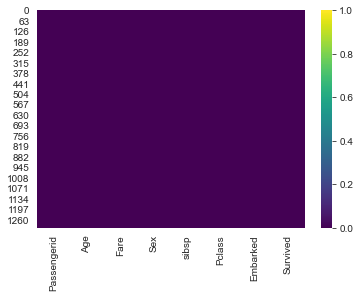

In [8]:
sns.heatmap(titanic_data.isnull(), cmap='viridis')

In [9]:
## There is no missing data in the dataset

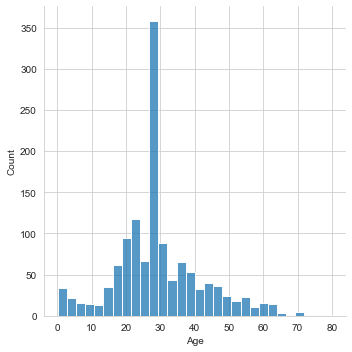

In [10]:
sns.displot(titanic_data['Age'], bins=30)

**Finally, create a pairplot with the hue defined by the 'Survived' column feature.**

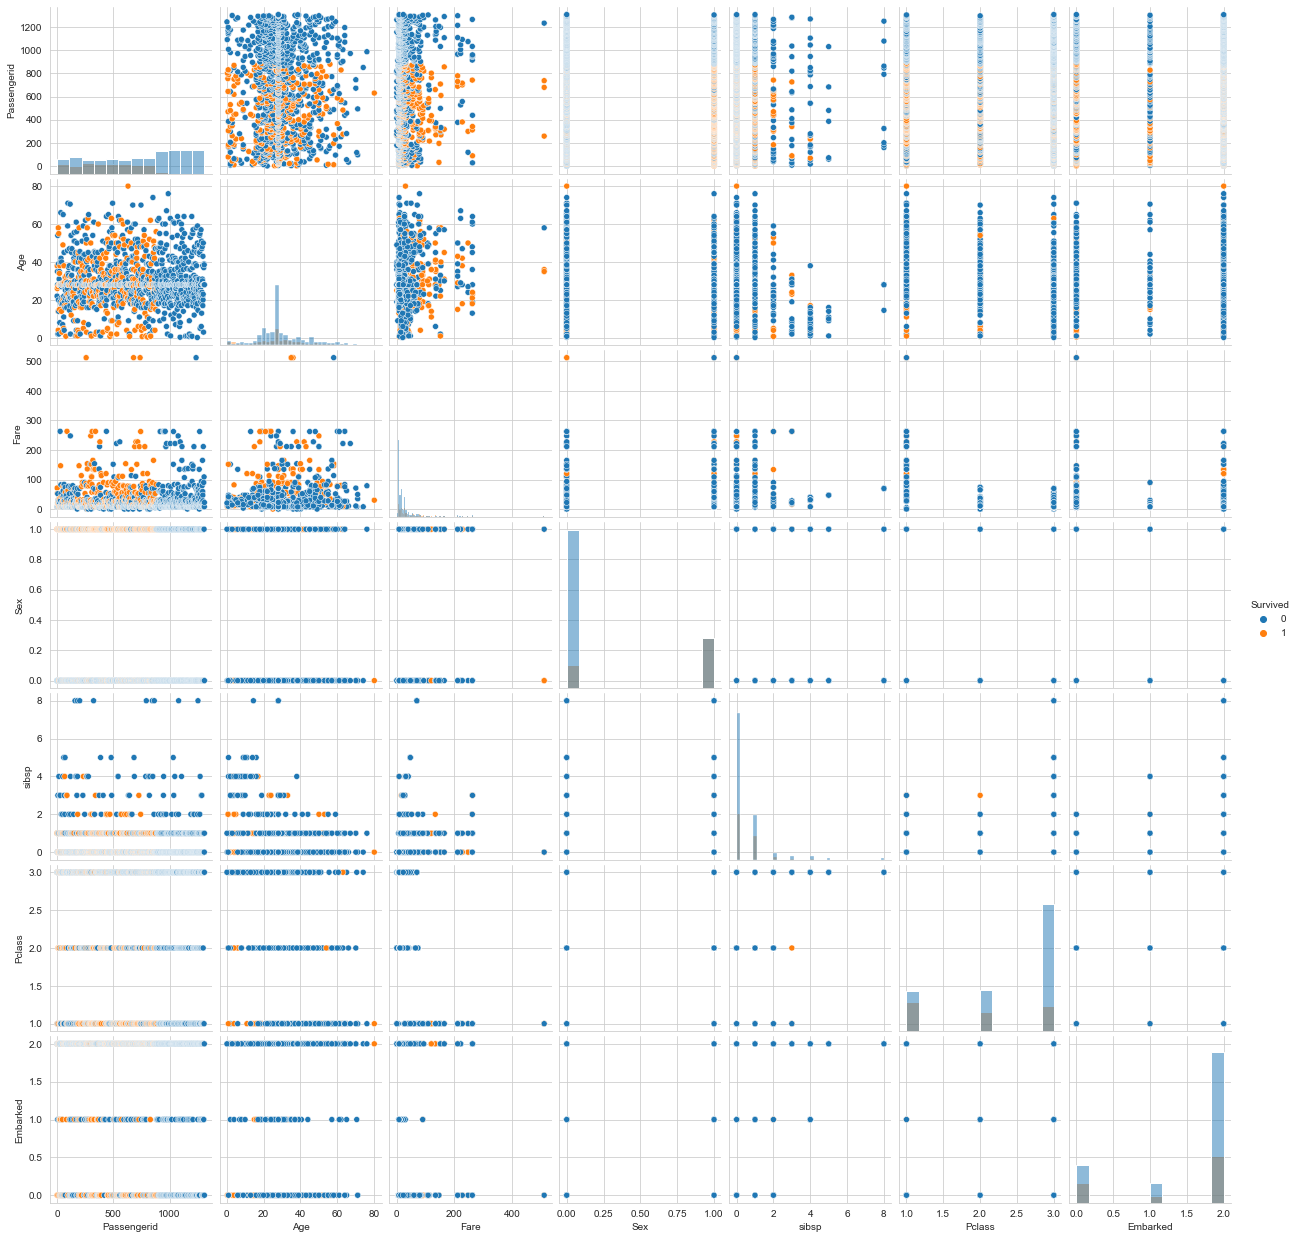

In [11]:
sns.pairplot(data=titanic_data, hue='Survived', diag_kind='hist')

# Logistic Regression

**Convert the categorical column to indicator column**

In [12]:
titanic = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True).rename(columns={'Sex_1': 'Sex'})

In [13]:
titanic.head()

,Passengerid,Age,Fare,sibsp,Pclass,Survived,Sex,Embarked_1.0,Embarked_2.0
0,1,22.0,7.2500,1,3,0,0,0,1
1,2,38.0,71.2833,1,1,1,1,0,0
2,3,26.0,7.9250,0,3,1,1,0,1
3,4,35.0,53.1000,1,1,1,1,0,1
4,5,35.0,8.0500,0,3,0,0,0,1


In [15]:
titanic = titanic[['Age', 'Fare', 'sibsp', 'Pclass', 'Survived', 'Sex', 'Embarked_1.0', 'Embarked_2.0']]

**Split the data into training set and testing set using train_test_split**

In [16]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=101)

**Train and fit a logistic regression model on the training set.**

In [18]:
logmodel = LogisticRegression(max_iter=10000)

In [19]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [20]:
predictions = logmodel.predict(X_test)

**Create a classification report for the model.**

In [21]:
class_report = classification_report(y_test, predictions)

In [22]:
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       281
           1       0.73      0.40      0.52       112

    accuracy                           0.79       393
   macro avg       0.76      0.67      0.69       393
weighted avg       0.78      0.79      0.76       393



In [23]:
print(confusion_matrix(y_test, predictions))

[[264  17]
 [ 67  45]]
